# So sánh các thuật toán tối ưu trong Deep Learning

Notebook này sẽ so sánh hiệu suất của các thuật toán tối ưu khác nhau (SGD, Adam, RMSprop) trên tập dữ liệu MNIST.

In [1]:
import sys
sys.path.append('../src')

import torch
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns

from models import SimpleCNN
from trainer import ModelTrainer
from utils import plot_training_curves, save_results_to_csv, compare_convergence_speed

# Đặt random seed để đảm bảo tính tái lập
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


## 1. Chuẩn bị dữ liệu

In [2]:
# Định nghĩa transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Tải dữ liệu MNIST
print('Đang tải dữ liệu MNIST...')
train_dataset = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('../data', train=False, transform=transform)

# Tạo DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)
print('Đã tải xong dữ liệu!')

# Hiển thị kích thước dữ liệu
print(f'Số lượng mẫu huấn luyện: {len(train_dataset)}')
print(f'Số lượng mẫu kiểm thử: {len(test_dataset)}')

Đang tải dữ liệu MNIST...
Đã tải xong dữ liệu!
Số lượng mẫu huấn luyện: 60000
Số lượng mẫu kiểm thử: 10000


## 2. Định nghĩa hàm huấn luyện

In [4]:
def train_with_optimizer(optimizer_name, learning_rate=0.01, momentum=0.9):
    """Huấn luyện mô hình với optimizer được chỉ định"""
    model = SimpleCNN().to(device)
    
    # Khởi tạo optimizer
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    else:
        raise ValueError(f'Optimizer {optimizer_name} không được hỗ trợ')
    
    # Huấn luyện mô hình
    trainer = ModelTrainer(model, device)
    train_metrics, val_metrics = trainer.train_model(
        optimizer=optimizer,
        train_loader=train_loader,
        val_loader=test_loader,
        epochs=10
    )
    
    return train_metrics, val_metrics

## 3. Thực hiện thí nghiệm với các Optimizer

In [5]:
# Thiết lập các optimizer và learning rate để thử nghiệm
optimizers = ['SGD', 'Adam', 'RMSprop']
learning_rates = [0.01, 0.001, 0.0001]
results = {}

# Thực hiện huấn luyện với mỗi optimizer và learning rate
for opt_name in optimizers:
    for lr in learning_rates:
        print(f'\nHuấn luyện với {opt_name}, learning rate = {lr}')
        try:
            key = f'{opt_name}_lr_{lr}'
            results[key] = train_with_optimizer(opt_name, learning_rate=lr)
            print(f'Hoàn thành huấn luyện với {opt_name}, lr={lr}')
        except Exception as e:
            print(f'Lỗi khi huấn luyện với {opt_name}, lr={lr}: {str(e)}')
            continue


Huấn luyện với SGD, learning rate = 0.01


Epoch 1/10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:25<00:00, 36.28it/s]


Epoch 1/10:
Train Loss: 0.2459 | Train Acc: 92.13%
Val Loss: 0.0695 | Val Acc: 97.68%


Epoch 2/10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:28<00:00, 33.37it/s]


Epoch 2/10:
Train Loss: 0.0675 | Train Acc: 97.92%
Val Loss: 0.0401 | Val Acc: 98.73%


Epoch 3/10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:28<00:00, 33.05it/s]


Epoch 3/10:
Train Loss: 0.0487 | Train Acc: 98.46%
Val Loss: 0.0333 | Val Acc: 98.85%


Epoch 4/10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:27<00:00, 33.75it/s]


Epoch 4/10:
Train Loss: 0.0399 | Train Acc: 98.78%
Val Loss: 0.0347 | Val Acc: 98.84%


Epoch 5/10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:27<00:00, 33.98it/s]


Epoch 5/10:
Train Loss: 0.0324 | Train Acc: 98.99%
Val Loss: 0.0250 | Val Acc: 99.18%


Epoch 6/10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:27<00:00, 34.48it/s]


Epoch 6/10:
Train Loss: 0.0276 | Train Acc: 99.08%
Val Loss: 0.0262 | Val Acc: 99.14%


Epoch 7/10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:27<00:00, 34.05it/s]


Epoch 7/10:
Train Loss: 0.0239 | Train Acc: 99.23%
Val Loss: 0.0270 | Val Acc: 99.10%


Epoch 8/10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:26<00:00, 34.92it/s]


Epoch 8/10:
Train Loss: 0.0190 | Train Acc: 99.38%
Val Loss: 0.0293 | Val Acc: 99.07%


Epoch 9/10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:26<00:00, 35.55it/s]


Epoch 9/10:
Train Loss: 0.0177 | Train Acc: 99.41%
Val Loss: 0.0255 | Val Acc: 99.17%


Epoch 10/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:25<00:00, 36.23it/s]


Epoch 10/10:
Train Loss: 0.0156 | Train Acc: 99.50%
Val Loss: 0.0225 | Val Acc: 99.32%
Hoàn thành huấn luyện với SGD, lr=0.01

Huấn luyện với SGD, learning rate = 0.001


Epoch 1/10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:27<00:00, 34.11it/s]


Epoch 1/10:
Train Loss: 0.6093 | Train Acc: 81.95%
Val Loss: 0.1849 | Val Acc: 94.75%


Epoch 2/10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:27<00:00, 34.07it/s]


Epoch 2/10:
Train Loss: 0.1832 | Train Acc: 94.59%
Val Loss: 0.1022 | Val Acc: 96.81%


Epoch 3/10:  43%|███████████████████████████████████████████████████▏                                                                  | 407/938 [00:11<00:15, 33.96it/s]


KeyboardInterrupt: 

## 4. Phân tích kết quả

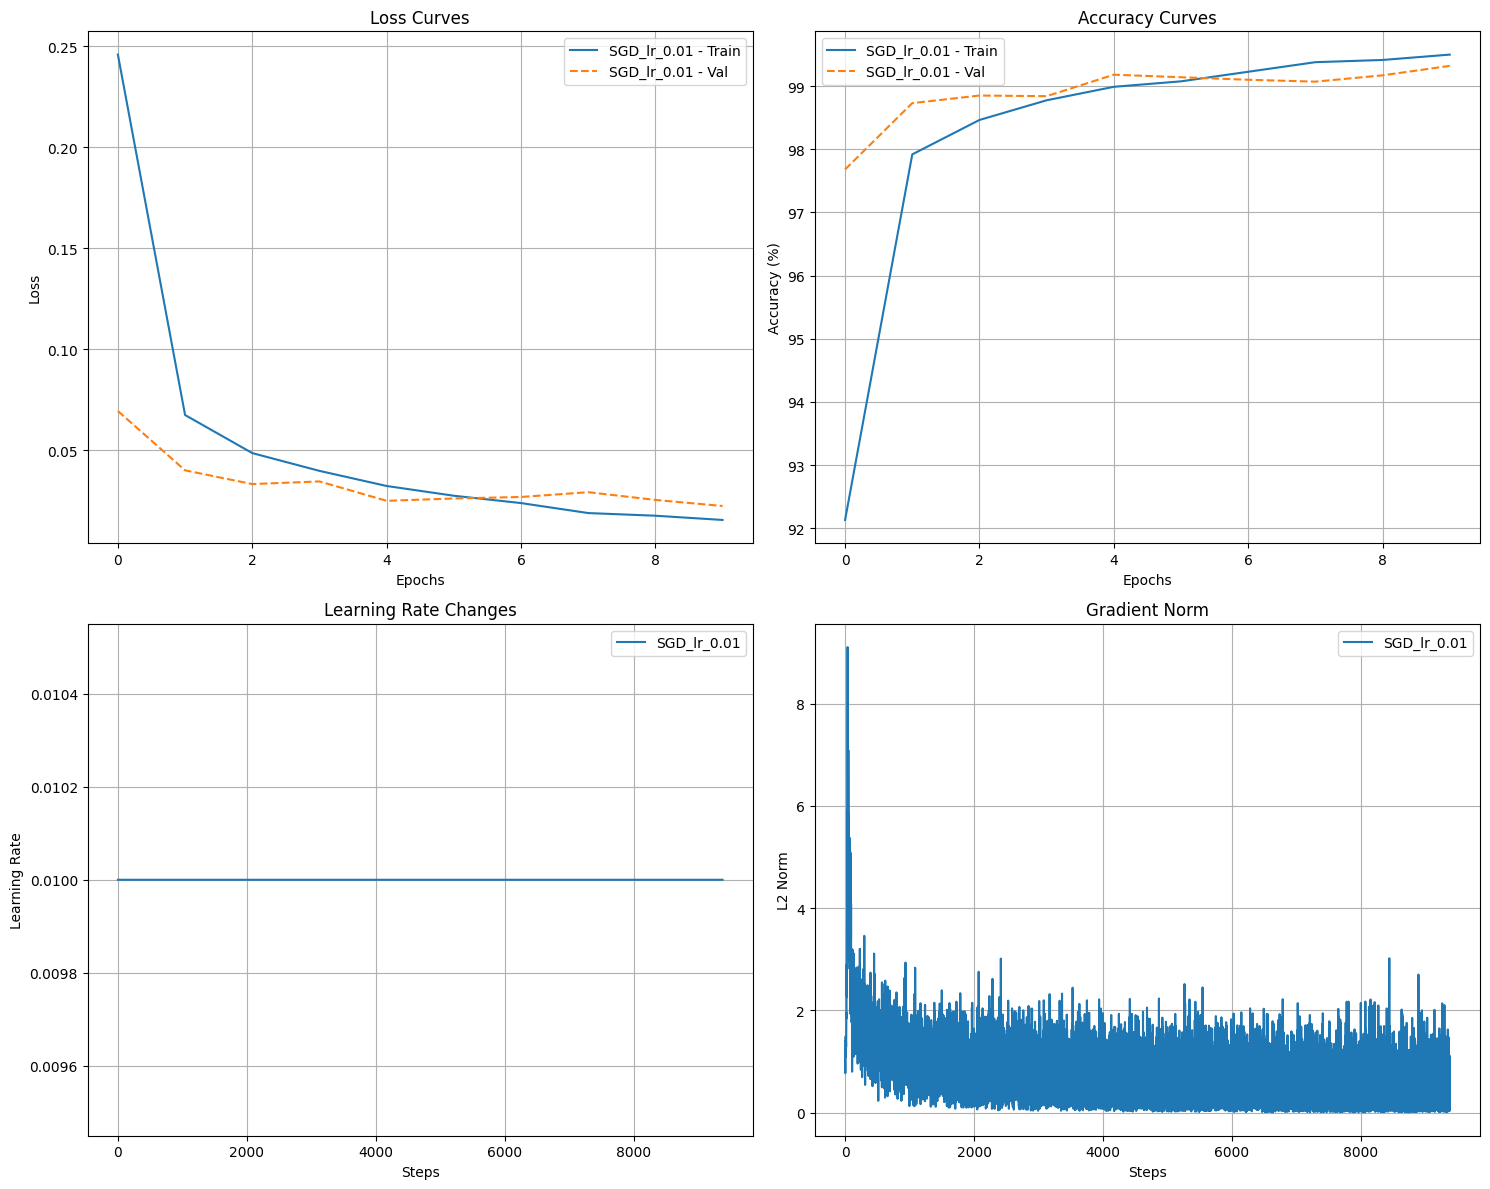

,Optimizer,Final Train Loss,Final Train Accuracy,Final Validation Loss,Final Validation Accuracy,Convergence Time (epochs)
0,SGD_lr_0.01,0.015579,99.498333,0.022493,99.32,10



Số epoch cần để đạt độ chính xác 95%:
SGD_lr_0.01: 2 epochs


In [6]:
# Vẽ đồ thị so sánh
plot_training_curves(results)
plt.savefig('../results/optimizer_comparison.png')
plt.show()

# Lưu kết quả vào file CSV
results_df = save_results_to_csv(results)
display(results_df)

# So sánh tốc độ hội tụ
convergence_epochs = compare_convergence_speed(results, target_accuracy=95.0)
print('\nSố epoch cần để đạt độ chính xác 95%:')
for opt_name, epochs in convergence_epochs.items():
    print(f'{opt_name}: {epochs if epochs != float("inf") else "Không đạt target"} epochs')